<a href="https://colab.research.google.com/github/Pratik972/Netflix-Movies-And-Tv-Shows-Clustering-Unsupervised/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
#Importing the libraries we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

##Mounting the dataset from google drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading The Dataset**
**Using Pandas Library, we’ll load the CSV file. Named it with 'Netflix_df' for this dataset.**

In [ ]:
#let's load the dataset from drive
Netflix_df = pd.read_csv('/content/drive/MyDrive/ML Project/NETFLIX_MOVIES_AND_TV_SHOWS/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',encoding = 'latin')

In [ ]:
#to show the top 5 row
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
Netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
Netflix_df.shape

(7787, 12)

In [ ]:
#checking column names
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#information of the dataset
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# describing the dataset
Netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
#creating a function for datainfo
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [ ]:
#checking DataInfoAll values
DataInfoAll(Netflix_df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...","DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


In [ ]:
#print duplicate values 
df_duplicate = Netflix_df[Netflix_df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* There are no duplicate values present in this dataset.

##    <b>. Data Cleaning & Data Visualization

In [ ]:
#total null values in dataset
Netflix_df.isnull().sum().sum()

3631

In [ ]:
#checking for null values 
#"TRUE"- The variable is containing null value
#"False"- The variable not containing null value
print('\nColumns with missing value:') 
print(Netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


There are a few columns that contain null values, “director,” “cast,” “country,” “date_added,” “rating.”

In [ ]:
#percentage of null values
NaN_Checker = pd.DataFrame({"No Of Total Values": Netflix_df.shape[0] , "No of NaN values": Netflix_df.isnull().sum(),
                    "%age of NaN values" : round((Netflix_df.isnull().sum()/ Netflix_df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values

# Data visualization for Null values present in the dataset

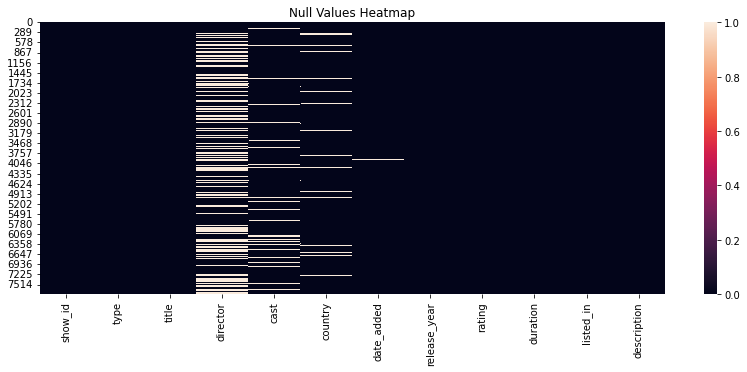

In [ ]:
#Heatmap graph of null values
plt.figure(figsize=(14, 5))
sns.heatmap(Netflix_df.isnull(), cbar=True)
plt.title("Null Values Heatmap")
plt.show()

Above in the heatmap and table, we can see that there are quite few null values in the dataset. There are a total of 3631 null values across the entire dataset with 2389 missing points under 'director',718 under 'cast', 570 under 'country', 10 under 'date_added', and 7 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

# **Data visualization(using Barplot) of distribution of NaN values in this dataset.**

<BarContainer object of 12 artists>

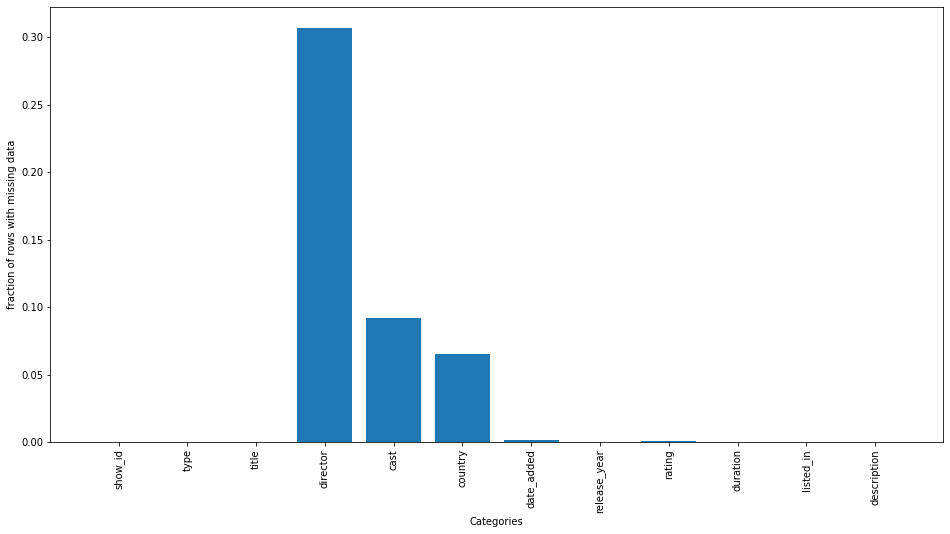

In [ ]:
# null values distribution
null_counts = Netflix_df.isnull().sum()/len(Netflix_df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.xlabel('Categories')
plt.bar(np.arange(len(null_counts)),null_counts)

* So from above bar graph its clear that **director** and **cast** contains large number of null values,so we will drop it.

# **Data Cleaning**

In [ ]:
#dropping irrelevant columns
Netflix_df.drop(['director','cast'],axis=1, inplace=True)

In [ ]:
#getting null values from date_added column
data_added_NaN = Netflix_df[Netflix_df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [ ]:
#to get shape of column
data_added_NaN.shape

(10, 10)

In [ ]:
#showing comparison of column date_added
print(f"Before dropping the NaN values from date_added the shape was {Netflix_df.shape}")
Netflix_df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {Netflix_df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7777, 10)


In [ ]:
#show the unique values in the dataset
Netflix_df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

 **From above table we see that category "type" contains 2 unique values so we will do analysis of this column.**

In [ ]:
#show unique value for type column
Netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

# **Exploratory Data Analysis and Visualization**

# **Netflix Content By 'type' category**

* **Analysis of entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.**

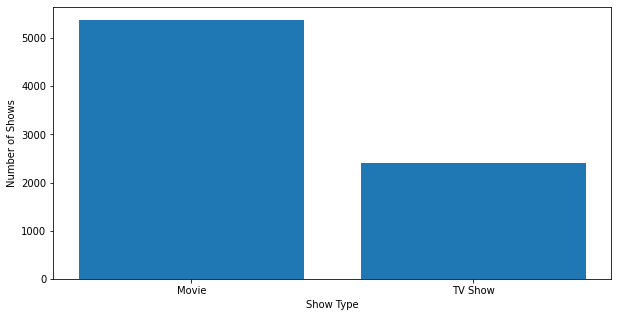

In [ ]:
#bar plot for type of shows
plt.figure(figsize=(10, 5))
plt.bar(Netflix_df.groupby('type')['type'].count().index, Netflix_df.groupby('type')['type'].count())
plt.ylabel('Number of Shows')
plt.xlabel('Show Type')
plt.show()

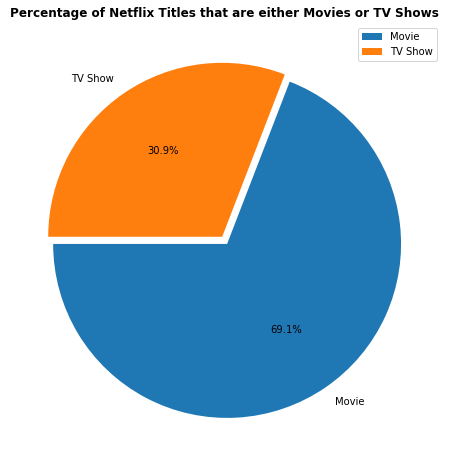

In [ ]:
#percent value of type column
plt.figure(figsize=(16,8))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows",weight="bold")
plt.pie(Netflix_df.type.value_counts(),explode=(0.025,0.025), labels=Netflix_df.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

So there are roughly 5,000+ movies and approx 3,000 Tv shows with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out as the majority. However, in terms of title, there are far more movie titles (69.1%) than TV show titles (30.9%).

**Now we will take a look at the amount content Netflix has added throughout the previous years**

In [ ]:
#to show the release year of 'type' column
yearly_movies=Netflix_df[Netflix_df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=Netflix_df[Netflix_df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=Netflix_df['release_year'].value_counts().sort_index(ascending=False).head(15)

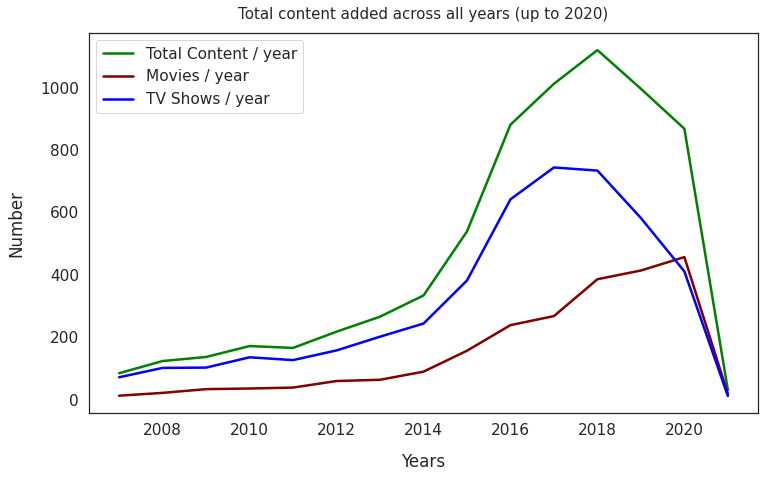

In [ ]:
#line graph for release_year vs number of contents
sns.set(font_scale=1.4,style='white')
#set_style()
total_content.plot(figsize=(12, 7), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 7), linewidth=2.5, color='maroon',label="Movies / year")
yearly_shows.plot(figsize=(12, 7), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Total content added across all years (up to 2020)", y=1.02, fontsize=15);

# Data analysis on **release_year** category.
* release_year : Actual Releaseyear of the movie / show
* First of all let's see all unique values present in **release_year**

In [ ]:
#to show unique values
Netflix_df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
#to show the data type
type(Netflix_df['release_year'][0])

numpy.int64

In [ ]:
#to count the value of a particular column
Netflix_df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1012,996,881,868,539,334,266,218,172,...,2,2,2,2,2,1,1,1,1,1


* Checking outliers on **release_year** column

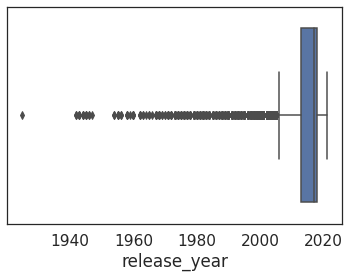

In [ ]:
sns.boxplot(Netflix_df.release_year)

* As we have seen earlier, **before 2014 the production growth for Movies & Tv Shows were very less** ,that's why here it's showing those values*(release_year less than 2009)* as outliers.

## **Treating outliers with mean value**
* Interquartile range(IQR) is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [ ]:
#checking interquartile range(IQR)
release_year_Q1 = Netflix_df.release_year.quantile(0.25)
release_year_Q3 = Netflix_df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


* Here its clear that we don't have have any release_year which is greater than 2018.

In [ ]:
#Treating outliers
release_year_outliers = Netflix_df[(Netflix_df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( Netflix_df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]  

In [ ]:
#print above variable which treat outliers
release_year_outliers

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Ãon Flux,United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,"Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


* we don't have have any release_year which is greater than 2018

In [ ]:
# 15 percentile value is 2009
Netflix_df["release_year"] = np.where(Netflix_df["release_year"] <2009, Netflix_df.release_year.mean(),Netflix_df['release_year'])

In [ ]:
#summary of release_year column
Netflix_df.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

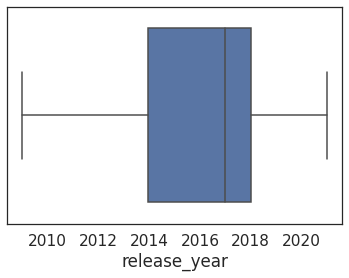

In [ ]:
#Data visualization of 'release_year' using Boxplot
sns.boxplot(Netflix_df.release_year)

* **After treating outliers as we can see from above boxplot that there are no more outliers inside release_year category**.

In [ ]:
#converting float type to int type of release_year
print(f"Datatype of release_year = ",type(Netflix_df.release_year.iloc[0]))
Netflix_df.release_year = Netflix_df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(Netflix_df.release_year.iloc[0]))

Datatype of release_year =  <class 'numpy.float64'>
Datatype of release_year =  <class 'numpy.int64'>


# Data analysis on **title** category
* title : Title of the Movie / Tv Show

In [ ]:
#to show the unique value
Netflix_df.title.nunique()

7777

In [ ]:
#to show the shape of tiltle column
Netflix_df.shape[0]

7777

# **Most occured word in 'title' category**

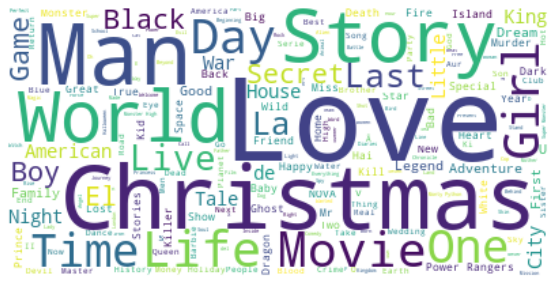

In [ ]:
#subsetting df
df_wordcloud = Netflix_df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Which **Countries** producing most number of contents

* Checking unique values present in Country

In [ ]:
#unique value in country
Netflix_df.country.nunique()

681

In [ ]:
#countries with count value
Netflix_df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2549,923,396,225,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


* **Checking no of NaN values in 'country'**

In [ ]:
#total null values in country
Netflix_df.country.isna().sum()

506